In [216]:
!pip install pandas plotly matplotlib seaborn nbformat scikit-learn  pyarrow==14.0.2 --upgrade --quiet

  error: subprocess-exited-with-error
  
  × Building wheel for pyarrow (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [358 lines of output]
      <string>:34: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
      C:\Users\DELL\AppData\Local\Temp\pip-build-env-rfwf1hfg\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      C:\Users\DELL\AppData\Local\Temp\pip-build-env-rfwf1hfg\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      C:\Users\DELL\AppData\Local\Temp\pip-build-env-rfwf1hfg\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are 

In [217]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn import preprocessing
from urllib.request import urlretrieve
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
%matplotlib inline

In [218]:
raw_df=pd.read_csv('weatherAUS.csv')
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [219]:
raw_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [220]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [221]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [222]:
raw_df.Location.value_counts()

Location
Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Launceston          3020
Adelaide            3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Nuriootpa           2996
Albany              2996
Sale                2992
Albury              2991
Watsonia            2990
Portland            2984
Woomera             2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
GoldCoast           2924
Witchcliffe         2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek   

**Exploratory Data Analysis**

In [223]:
px.histogram(raw_df,x='Location',title='Locations VS Raining Days',color='RainToday')

In [224]:
px.histogram(raw_df,x='Temp3pm',title='Locations VS Raining Days',color='RainToday')

In [225]:
px.histogram(raw_df,x='Temp3pm',title='Locations VS RainTomorrow',color='RainTomorrow')

In [226]:
px.histogram(raw_df,x='RainTomorrow', color='RainToday', title="Rain today vs tomorrow")

In [227]:
px.scatter(raw_df.sample(2000),x='MinTemp',y='MaxTemp', color='RainToday', title='Max and Mintemp vs RainToday')

**train and test Split**

In [228]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(raw_df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [229]:
print('train_df: ',train_df)
print('val_df: ',val_df)
print('test_df: ',test_df)

train_df:                Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
12319   2009-09-10        Moree      4.1     21.7       0.0          4.6   
88560   2012-09-21       Cairns     18.9     30.0       0.0          8.0   
42526   2017-06-05  Williamtown      7.3     18.5       0.2          NaN   
139212  2008-10-10       Darwin     24.8     35.5       0.0          5.0   
25223   2012-01-01      Penrith     13.2     32.3       0.0          NaN   
...            ...          ...      ...      ...       ...          ...   
141207  2014-06-25       Darwin     16.0     29.9       0.0          5.0   
95983   2016-07-24   Townsville     16.8     27.8       0.0          4.4   
39457   2017-04-06   WaggaWagga      8.5     24.8       0.0          4.8   
92898   2016-06-09    GoldCoast     12.7     26.9       0.0          NaN   
122949  2015-01-26        Perth     16.7     37.1       0.0         11.2   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
12319  

In [230]:
print('train_df: ',train_df.shape)
print('val_df: ',val_df.shape)
print('test_df: ',test_df.shape)

train_df:  (84471, 23)
val_df:  (28158, 23)
test_df:  (28158, 23)


<Axes: title={'center': 'years in dataset'}, xlabel='Date', ylabel='count'>

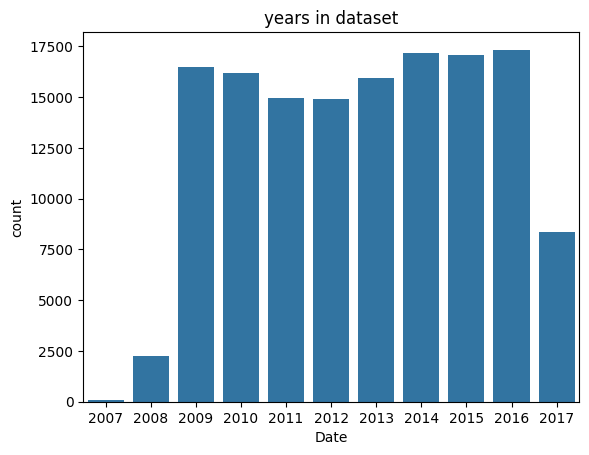

In [231]:
plt.title('years in dataset')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [232]:
year=pd.to_datetime(raw_df.Date).dt.year

train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [233]:
print('train_df: ',train_df.shape)
print('val_df: ',val_df.shape)
print('test_df: ',test_df.shape)

train_df:  (97988, 23)
val_df:  (17089, 23)
test_df:  (25710, 23)


In [234]:
print('train_df: ',train_df.info())
print('val_df: ',val_df.info())
print('test_df: ',test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           97988 non-null  object 
 1   Location       97988 non-null  object 
 2   MinTemp        97674 non-null  float64
 3   MaxTemp        97801 non-null  float64
 4   Rainfall       97988 non-null  float64
 5   Evaporation    61657 non-null  float64
 6   Sunshine       57942 non-null  float64
 7   WindGustDir    91120 non-null  object 
 8   WindGustSpeed  91160 non-null  float64
 9   WindDir9am     90969 non-null  object 
 10  WindDir3pm     96036 non-null  object 
 11  WindSpeed9am   97114 non-null  float64
 12  WindSpeed3pm   96919 non-null  float64
 13  Humidity9am    96936 non-null  float64
 14  Humidity3pm    96872 non-null  float64
 15  Pressure9am    88876 non-null  float64
 16  Pressure3pm    88857 non-null  float64
 17  Cloud9am       63000 non-null  float64
 18  Cloud3pm  

In [235]:
input_cols=list(train_df.columns)[1:-1]
target_cols='RainTomorrow'

In [236]:
print(input_cols)
print(target_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
RainTomorrow


In [237]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()
print(train_inputs)
print(train_targets)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W           44.0          W        WNW          20.0   
1            

In [238]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()
print(val_inputs)
print(val_targets)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury     11.4     33.5       0.0          NaN       NaN   
2134     Albury     15.5     39.6       0.0          NaN       NaN   
2135     Albury     17.1     38.3       0.0          NaN       NaN   
2136     Albury     26.0     33.1       0.0          NaN       NaN   
2137     Albury     19.0     35.2       0.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144913    Uluru     20.5     34.7       0.0          NaN       NaN   
144914    Uluru     18.0     36.4       0.0          NaN       NaN   
144915    Uluru     17.5     37.1       0.0          NaN       NaN   
144916    Uluru     20.0     38.9       0.0          NaN       NaN   
144917    Uluru     19.3     37.4       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133           WSW           30.0        ESE          W           7.0   
2134         

In [239]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_cols].copy()
print(test_inputs)
print(test_targets)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury     20.4     37.6       0.0          NaN       NaN   
2499     Albury     20.9     33.6       0.4          NaN       NaN   
2500     Albury     18.4     23.1       2.2          NaN       NaN   
2501     Albury     17.3     23.7      15.6          NaN       NaN   
2502     Albury     15.5     22.9       6.8          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145454    Uluru      3.5     21.8       0.0          NaN       NaN   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE           54.0        NaN        ESE           0.0   
2499         

In [240]:
num_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols=train_inputs.select_dtypes('object').columns.tolist()
print(cat_cols)
print(num_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [241]:
train_inputs[num_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [242]:
train_inputs[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [243]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')

In [244]:
raw_df[num_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [245]:
train_df[num_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [246]:
imputer.fit(raw_df[num_cols])
imputer

SimpleImputer()

In [247]:
list(imputer.statistics_)

[np.float64(12.184823865620478),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047283),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543716),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.987066387879914),
 np.float64(21.693182690011074)]

In [248]:
train_inputs[num_cols]=imputer.transform(train_df[num_cols])
val_inputs[num_cols]=imputer.transform(val_df[num_cols])
test_inputs[num_cols]=imputer.transform(test_df[num_cols])

In [249]:
print(train_inputs.isna().sum())
print(val_inputs.isna().sum())
print(test_inputs.isna().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6868
WindGustSpeed       0
WindDir9am       7019
WindDir3pm       1952
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
dtype: int64
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir       893
WindGustSpeed       0
WindDir9am       1099
WindDir3pm        511
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
dtype: int64
Location            0
MinTemp             0
MaxTem

**Using MinMax Scaler to Normalize**

In [250]:
from sklearn.preprocessing import MinMaxScaler

In [251]:
scalar=MinMaxScaler()

In [252]:
scalar.fit(raw_df[num_cols])

MinMaxScaler()

In [253]:
print(train_inputs.isna().sum())
print(val_inputs.isna().sum())
print(test_inputs.isna().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6868
WindGustSpeed       0
WindDir9am       7019
WindDir3pm       1952
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
dtype: int64
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir       893
WindGustSpeed       0
WindDir9am       1099
WindDir3pm        511
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
dtype: int64
Location            0
MinTemp             0
MaxTem

In [254]:
train_inputs[num_cols]=scalar.transform(train_inputs[num_cols])
val_inputs[num_cols]=scalar.transform(val_inputs[num_cols])
test_inputs[num_cols]=scalar.transform(test_inputs[num_cols])

In [255]:
print(train_inputs.describe())
print(val_inputs.describe())
print(test_inputs.describe())

            MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424

In [256]:
print(train_inputs.isna().sum())
print(val_inputs.isna().sum())
print(test_inputs.isna().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6868
WindGustSpeed       0
WindDir9am       7019
WindDir3pm       1952
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
dtype: int64
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir       893
WindGustSpeed       0
WindDir9am       1099
WindDir3pm        511
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
dtype: int64
Location            0
MinTemp             0
MaxTem

In [257]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [258]:
encoder.fit(raw_df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [259]:
encoder.transform(train_inputs[cat_cols])

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(97988, 102))

In [260]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [261]:
encoder_cols_name=list(encoder.get_feature_names_out(cat_cols))
print(encoder_cols_name)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [262]:
train_inputs[encoder_cols_name]=encoder.transform(train_inputs[cat_cols])
val_inputs[encoder_cols_name]=encoder.transform(val_inputs[cat_cols])
test_inputs[encoder_cols_name]=encoder.transform(test_inputs[cat_cols])

C:\Users\DELL\AppData\Local\Temp\ipykernel_26968\1481261900.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\DELL\AppData\Local\Temp\ipykernel_26968\1481261900.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\DELL\AppData\Local\Temp\ipykernel_26968\1481261900.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [263]:
pd.set_option('display.max_columns',None)

In [264]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W       0.294574          W        WNW      0.153846   
1              WNW       0.294574        NNW        WSW      0.030769   
2              WSW       0.310078          W        WSW      0.146154   
3               NE       0.139535         SE          E      0.084615   
4                W       0.271318        ENE         NW      0.053846   
...            ...            ...        ...        ...           ...   
144548         SSE       0.286822        ESE        SSE      0.184615   
144549          NE       0.193798        ENE         SW      0.146154   
144550         ESE       0.255814        ESE        SSE      0.200000   
144551         ESE       0.286822        ESE        SSW      0.215385   
144552         WNW       0.542636        ENE        SSW      0.230769   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.275862         0.71         0.22     0.449587       0.4800   
1           0.252874         0.44         0.25     0.497521       0.4912   
2           0.298851         0.38         0.30     0.447934       0.5056   
3           0.103448         0.45         0.16     0.613223       0.5712   
4           0.229885         0.82         0.33     0.500826       0.4624   
...              ...          ...          ...          ...          ...   
144548      0.298851         0.22         0.13     0.555372       0.5232   
144549      0.229885         0.16         0.08     0.530579       0.4880   
144550      0.103448         0.15         0.08     0.519008       0.4944   
144551      0.195402         0.22         0.09     0.553719       0.5136   
144552      0.149425         0.16         0.09     0.522314       0.4656   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
0       0.888889  0.499917  0.508439  0.522073        No                0.0   
1       0.492351  0.499917  0.514768  0.570058        No                0.0   
2       0.492351  0.222222  0.594937  0.548944        No                0.0   
3       0.492351  0.499917  0.533755  0.612284        No                0.0   
4       0.777778  0.888889  0.527426  0.673704        No                0.0   
...          ...       ...       ...       ...       ...                ...   
144548  0.492351  0.499917  0.651899  0.714012        No                0.0   
144549  0.492351  0.499917  0.761603  0.771593        No                0.0   
144550  0.492351  0.499917  0.778481  0.788868        No                0.0   
144551  0.492351  0.499917  0.780591  0.817658        No                0.0   
144552  0.492351  0.499917  0.786920  0.821497        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
0                   0.0              1.0                    0.0   
1                   0.0              1.0                    0.0   
2                   0.0              1.0                    0.0   
3                   0.0              1.0                    0.0   
4                   0.0              1.0                    0.0   
.

In [265]:
print(train_inputs.isna().sum())
print(val_inputs.isna().sum())
print(test_inputs.isna().sum())

Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_WNW    0
WindDir3pm_WSW    0
WindDir3pm_nan    0
RainToday_No      0
RainToday_Yes     0
Length: 123, dtype: int64
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_WNW    0
WindDir3pm_WSW    0
WindDir3pm_nan    0
RainToday_No      0
RainToday_Yes     0
Length: 123, dtype: int64
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_WNW    0
WindDir3pm_WSW    0
WindDir3pm_nan    0
RainToday_No      0
RainToday_Yes     0
Length: 123, dtype: int64


In [266]:
print('train_inputs: ',train_inputs.shape)
print('train_targets: ',train_targets.shape)
print('val_inputs: ',val_inputs.shape)
print('val_targets: ',val_targets.shape)
print('test_inputs: ',test_inputs.shape)
print('test_targets: ',test_targets.shape)

train_inputs:  (97988, 123)
train_targets:  (97988,)
val_inputs:  (17089, 123)
val_targets:  (17089,)
test_inputs:  (25710, 123)
test_targets:  (25710,)


**Saving values to Parquet**

In [267]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [268]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

**Reading values from Parquet**

In [269]:
train_inputs=pd.read_parquet('train_inputs.parquet')
val_inputs=pd.read_parquet('val_inputs.parquet')
test_inputs=pd.read_parquet('test_inputs.parquet')
train_targets=pd.read_parquet('train_targets.parquet')[target_cols]
val_targets=pd.read_parquet('val_targets.parquet')[target_cols]
test_targets=pd.read_parquet('test_targets.parquet')[target_cols]

In [270]:
print('train_inputs: ',train_inputs.shape)
print('train_targets: ',train_targets.shape)
print('val_inputs: ',val_inputs.shape)
print('val_targets: ',val_targets.shape)
print('test_inputs: ',test_inputs.shape)
print('test_targets: ',test_targets.shape)

train_inputs:  (97988, 123)
train_targets:  (97988,)
val_inputs:  (17089, 123)
val_targets:  (17089,)
test_inputs:  (25710, 123)
test_targets:  (25710,)


**Logistic Regression**

In [271]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')

In [272]:
train_inputs[num_cols+encoder_cols_name]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1       0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2       0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3       0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4       0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037741  0.526244       0.286822   
144549  0.556604  0.786389  0.000000     0.037741  0.526244       0.193798   
144550  0.608491  0.805293  0.000000     0.037741  0.526244       0.255814   
144551  0.674528  0.818526  0.000000     0.037741  0.526244       0.286822   
144552  0.731132  0.839319  0.000000     0.037741  0.526244       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
144548      0.184615      0.298851         0.22         0.13     0.555372   
144549      0.146154      0.229885         0.16         0.08     0.530579   
144550      0.200000      0.103448         0.15         0.08     0.519008   
144551      0.215385      0.195402         0.22         0.09     0.553719   
144552      0.230769      0.149425         0.16         0.09     0.522314   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0            0.4800  0.888889  0.499917  0.508439  0.522073   
1            0.4912  0.492351  0.499917  0.514768  0.570058   
2            0.5056  0.492351  0.222222  0.594937  0.548944   
3            0.5712  0.492351  0.499917  0.533755  0.612284   
4            0.4624  0.777778  0.888889  0.527426  0.673704   
...             ...       ...       ...       ...       ...   
144548       0.5232  0.492351  0.499917  0.651899  0.714012   
144549       0.4880  0.492351  0.499917  0.761603  0.771593   
144550       0.4944  0.492351  0.499917  0.778481  0.788868   
144551       0.5136  0.492351  0.499917  0.780591  0.817658   
144552       0.4656  0.492351  0.499917  0.786920  0.821497   

        Location_Adelaide  Location_Albany  Location_Albury  \
0                     0.0              0.0              1.0   
1                     0.0              0.0              1.0   
2                     0.0              0.0              1.0   
3                     0.0              0.0              1.0   
4                     0.0              0.0              1.0   
...                   ...              ...              ...   
144548                0.0              0.0              0.0   
144549                0.0              0.0              0.0   
144550                0.0              0.0              0.0   
144551                0.0              0.0              0.0   
144552                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                0.0   
4                         0.0                     0.0                0.0   
...                       ...                     ...                ...   
144548                    0.0                     0.0                0.0   
144549                   

In [273]:
%%time
model.fit(train_inputs[num_cols+encoder_cols_name],train_targets)

CPU times: total: 1.19 s
Wall time: 1.18 s


LogisticRegression(solver='liblinear')

In [274]:
model.coef_.tolist()

[[0.8986313128330564,
  -2.879915340298116,
  3.162777967911932,
  0.8542458528071624,
  -1.6713939013797654,
  6.764400645603474,
  -0.942321897250368,
  -1.4284286295860533,
  0.32289251720903966,
  5.995315355640688,
  5.463856280789369,
  -9.176804282462346,
  -0.1622970953203723,
  1.2876597427776009,
  0.47471513480814376,
  2.021430266000858,
  0.6016501981931874,
  -0.552482047475684,
  0.4781427901224423,
  0.007669719340064555,
  0.3468145432716479,
  -0.35227722934245886,
  0.17971072565369664,
  0.4404864374776048,
  -0.013981786273776551,
  0.028943826416811855,
  0.2581473564635528,
  -0.021205574578786593,
  -0.042794926162091476,
  -0.48314169432336285,
  -0.13756336159767688,
  -0.5760596302538659,
  -0.7875234865564265,
  -0.2554040657380509,
  -0.3288839342313506,
  -0.5690044007489978,
  0.08183002099871019,
  0.013382504682580874,
  0.06412750250393069,
  -0.9020545507100943,
  -0.4443298806347113,
  0.008517131580252791,
  -0.46061238362267864,
  -0.46551811417160

In [275]:
n=len(model.coef_.tolist())
weight_df=pd.DataFrame({
    'Features':(num_cols+encoder_cols_name),
    'Weight':model.coef_.tolist()[0]
})

In [276]:
print(model.intercept_)

[-2.44955409]


<Axes: xlabel='Weight', ylabel='Features'>

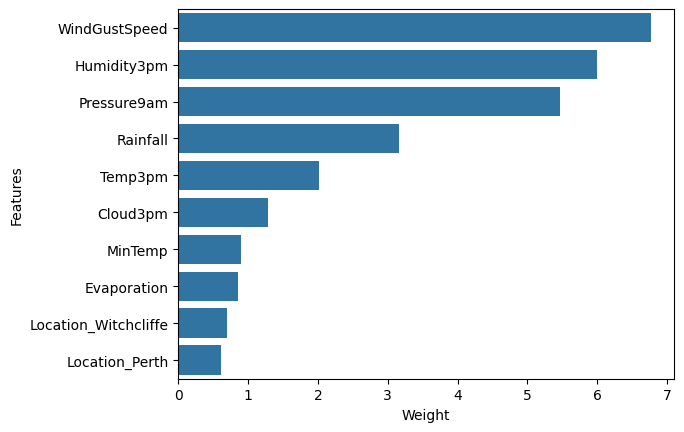

In [277]:
# plt.figure(figsize=(10,50))
sns.barplot(data=weight_df.sort_values('Weight',ascending=False).head(10),x='Weight',y='Features')

**Making Predictions and evaluating Model**

In [278]:
X_train=train_inputs[num_cols+encoder_cols_name]
X_val=val_inputs[num_cols+encoder_cols_name]
X_test=test_inputs[num_cols+encoder_cols_name]

In [279]:
train_preds=model.predict(X_train)

In [280]:
list(train_preds)

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No'

In [281]:
train_proba=model.predict_proba(X_train)
train_proba

array([[0.94401104, 0.05598896],
       [0.94074117, 0.05925883],
       [0.96093596, 0.03906404],
       ...,
       [0.98749103, 0.01250897],
       [0.98334665, 0.01665335],
       [0.87453324, 0.12546676]], shape=(97988, 2))

In [282]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [283]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

**Getting Accuracy**

In [284]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets,train_preds)

0.8519206433440829

In [285]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [286]:
def predict_and_plot(inputs,targets,name=''):
    pred=model.predict(inputs)
    accuracy=accuracy_score(targets,pred)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    cf=confusion_matrix(targets,pred,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title('{} Confusion Matrix'.format(name))

Accuracy: 85.19%


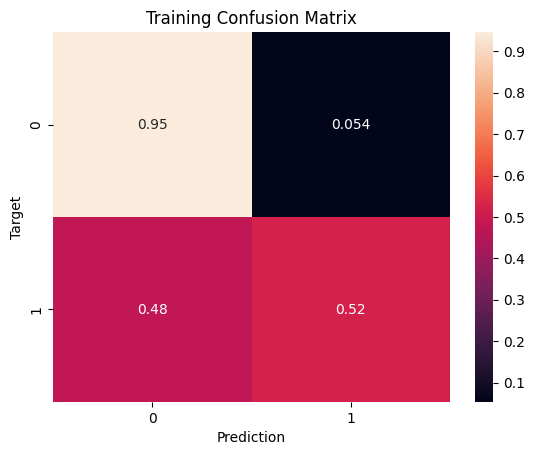

In [287]:
predict_and_plot(X_train,train_targets,'Training')

Accuracy: 85.40%


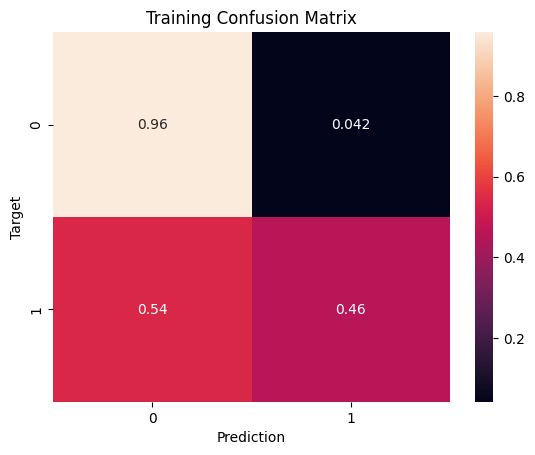

In [288]:
predict_and_plot(X_val,val_targets,'Training')

Accuracy: 84.20%


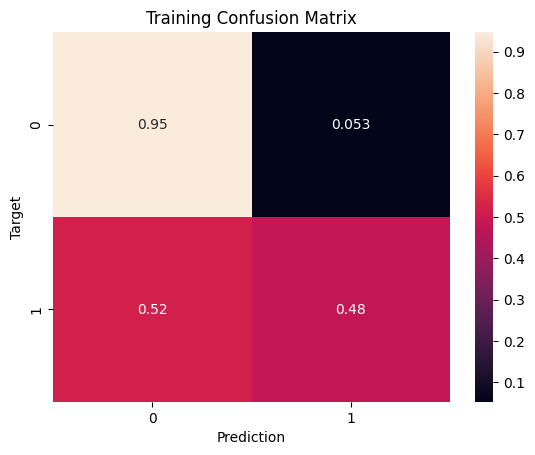

In [289]:
predict_and_plot(X_test,test_targets,'Training')

**Making predictions on a single data(input)**

In [304]:
new_input={
    'Date':	'2025-7-23', 
    'Location': 'Katherine', 
    'MinTemp':	11.0,
    'MaxTemp':	34.0,
    'Rainfall':	10.2,
    'Evaporation':	4.2,
    'Sunshine':	8.0,
    'WindGustDir':	'NNW',
    'WindGustSpeed':	92.2,
    'WindDir9am':	'NW',
    'WindDir3pm':	'NNE',
    'WindSpeed9am':	13.0,
    'WindSpeed3pm':	20.0,
    'Humidity9am':	89.0,
    'Humidity3pm':	58.0,
    'Pressure9am':	1004.8,
    'Pressure3pm':	1001.5,
    'Cloud9am':	8.0,
    'Cloud3pm':	5.0,
    'Temp9am':	25.7,
    'Temp3pm':	33.0,
    'RainToday': 'Yes'
}

In [305]:
new_input_df=pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2025-7-23  Katherine     11.0     34.0      10.2          4.2       8.0   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           92.2         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

In [306]:
new_input_df[num_cols]=imputer.transform(new_input_df[num_cols])
new_input_df[num_cols]=scalar.transform(new_input_df[num_cols])
new_input_df[encoder_cols_name]=encoder.transform(new_input_df[cat_cols])
new_input_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_26968\2576431968.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\DELL\AppData\Local\Temp\ipykernel_26968\2576431968.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\DELL\AppData\Local\Temp\ipykernel_26968\2576431968.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2025-7-23  Katherine  0.459906  0.733459  0.027493     0.028966  0.551724   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW       0.668217         NW        NNE           0.1   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0      0.229885         0.89         0.58     0.401653       0.3904  0.888889   

   Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  Location_Albany  \
0  0.555556  0.694093  0.737044       Yes                0.0              0.0   

   Location_Albury  Location_AliceSprings  Location_BadgerysCreek  \
0              0.0                    0.0                     0.0   

   Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                0.0               0.0                0.0              0.0   

   Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
0                0.0             0.0                    0.0   

   Location_Dartmoor  Location_Darwin  Location_GoldCoast  Location_Hobart  \
0                0.0              0.0                 0.0              0.0   

   Location_Katherine  Location_Launceston  Location_Melbourne  \
0                 1.0                  0.0                 0.0   

   Location_MelbourneAirport  Location_Mildura  Location_Moree  \
0                        0.0               0.0             0.0   

   Location_MountGambier  Location_MountGinini  Location_Newcastle  \
0                    0.0                   0.0                 0.0   

   Location_Nhil  Location_NorahHead  Location_NorfolkIsland  \
0            0.0                 0.0                     0.0   

   Location_Nuriootpa  Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                 0.0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir

In [307]:
x_new_input=new_input_df[num_cols+encoder_cols_name]
x_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.459906  0.733459  0.027493     0.028966  0.551724       0.668217   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0       0.3904  0.888889  0.555556  0.694093  0.737044                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0           

In [308]:
model.predict(x_new_input)[0]

'Yes'

In [309]:
model.predict_proba(x_new_input)[0]

array([0.13714574, 0.86285426])

**Saving and loading trained Model**

creating a DIctionary containg all the data

In [310]:
aussie_rain={
    'model':model,
    'imputer':imputer,
    'scalar':scalar,
    'encoder':encoder,
    'input_cols':input_cols,
    'target_cols':target_cols,
    'num_cols':num_cols,
    'encoder_cols_name':encoder_cols_name,
}

In [297]:
import joblib
joblib.dump(aussie_rain,'aussie_rain.joblib')

['aussie_rain.joblib']

loading a model withh all the dependencies

In [298]:
aussie_rain2=joblib.load('aussie_rain.joblib')

In [299]:
aussie_rain2['model'].coef_

array([[ 8.98631313e-01, -2.87991534e+00,  3.16277797e+00,
         8.54245853e-01, -1.67139390e+00,  6.76440065e+00,
        -9.42321897e-01, -1.42842863e+00,  3.22892517e-01,
         5.99531536e+00,  5.46385628e+00, -9.17680428e+00,
        -1.62297095e-01,  1.28765974e+00,  4.74715135e-01,
         2.02143027e+00,  6.01650198e-01, -5.52482047e-01,
         4.78142790e-01,  7.66971934e-03,  3.46814543e-01,
        -3.52277229e-01,  1.79710726e-01,  4.40486437e-01,
        -1.39817863e-02,  2.89438264e-02,  2.58147356e-01,
        -2.12055746e-02, -4.27949262e-02, -4.83141694e-01,
        -1.37563362e-01, -5.76059630e-01, -7.87523487e-01,
        -2.55404066e-01, -3.28883934e-01, -5.69004401e-01,
         8.18300210e-02,  1.33825047e-02,  6.41275025e-02,
        -9.02054551e-01, -4.44329881e-01,  8.51713158e-03,
        -4.60612384e-01, -4.65518114e-01, -6.94989159e-02,
         1.91158759e-01,  4.50475879e-01,  6.08121047e-01,
         4.27313870e-01, -2.83312576e-02,  2.51546743e-0